# Choosing the number of segments when data only contain numerical variables - Silhouette coefficient method

This document shows how to choose the number of segments (optimal $k$) using Silhouette coefficient charts. The method applies to datasets **only containing numerical variables.**

## Introducing Silhouette coefficient method

**What can be considered a good clustering outcome?** A desirable clustering outcome should satisfy the following two properties:
- A data point should be close to points *in the same cluster*
- A data point should be far away from points *in other clusters*
<br/>
**How will the number of clusters affect these two properties?** On the one hand, when we have too few clusters, consumers fall into the same cluster even if they are far away from each other. So, the first property is likely to be violated. On the other hand, when we have too many clusters, consumers fall into different clusters even if these consumers are close to each other. So, the second property is likely to be violated. 

**Silhouette score** : The score measures how well the two properties are held. Let $a$ be the average distance from a data point to all data points **in the same cluster**. Let $b$ be the average distance from this data point to all data points **in the nearest cluster that this data point does not belong to**. By definition, the score can be calculated when there are at least two clusters.
<br/>
<br/>
Ideally, $a$ should be small and $b$ should be large. The Silhouette coefficient for this point is
$$\frac {b - a} {max\{a,b\}}$$
, which ranges from -1 to 1. A higher Silhouette coefficient suggests that $b$ is larger and $a$ is smaller.
<br/>
For a clustering outcome, its Silhouette score is the average Silhouette coefficient for all the data points. A higher score indicates a better clustering outcome.



**How Silhouette score chart works**: The chart plots a curve of how the Silhouette score changes with the number of clusters $k$. The optimal number of segments will have the highest Silhouette score.

**Procedure**: Suppose we want to create no more than $K$ segments. The procedure is as follows:
1. For $k$ from $2$ to $K$, run k-mean algorithm with $k$ clusters, and calculate and record the Silhouette score.
2. Plot the Silhouette score over the number of segments $k$ .
3. Find the $k$ with the highest Silhouette score. This is the optimal number of segments.
4. Use the optimal $k$ to run k-mean algorithm to segment consumers.

We will use "MallCustomersTwoVariables.csv" for analysis.

## Loading data and preprocessing 

This section will generate the normalized dataframe, `df_normalized`, for k-mean algorihm.

In [1]:
# importing packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans    # Use "sklearn/cluster/KMeans" for clustering analysis 

# importing data and renaming variables
df = pd.read_csv("C:/Users/zoutianxin/Dropbox/Teach/Marketing analytics/2021/2021 Analytics/clustering/datasets/MallCustomersTwoVariables.csv",index_col=0) # use the first column (customer id) as index
df = df.rename(columns = {"Annual Income (k$)":"annual_income","Spending Score (1-100)":"spending_score"})


# normalizing the data for k-mean algorithm
df_normalized = (df-df.min())/(df.max()-df.min())  # By default, pandas calculate maximums and minimums by columns, which serves our purpose.

## Calculate Silhouette score for each $k$

For exposition, we will create no more than $K = 10$ clusters, and calculate the Silhouette score when $k = 2,3,...,K$. This can be achieved with a for loop.
<br />
(If you use Windows, you may see a warning of "KMeans is known to have a memory leak...." Don't worry in our case because both our data size and the number of clusters are much smaller than when the problem will happen.)

In [2]:
from sklearn.metrics import silhouette_score        # import the function to calculate Silhouette score
K = 10  # K is the maximum number of clusters we will check
store_Silhouette = np.zeros(K-1)    # create a vector to store Silhouette score. k is between 2 and K. 

for k in range(2, K+1):                                   # try k from 2 to K  
    kmeanSpec = KMeans(n_clusters = k, n_init = 100)                        # set up k-mean model with k clusters
    kmean_result = kmeanSpec.fit(df_normalized)               # run k-mean on normalized data
    kmean_prediction = kmean_result.labels_                 # the predicted segments for consumers  
    store_Silhouette[k-2] = silhouette_score(df_normalized, kmean_prediction)         # calculate and store the Silhouette score in store_Silhouette

store_Silhouette

array([0.33340205, 0.45149093, 0.49620079, 0.55948545, 0.53806528,
       0.51830793, 0.42983976, 0.44100623, 0.44635994])

## Generate Silhouette chart

Text(0.5, 0, 'number of clusters')

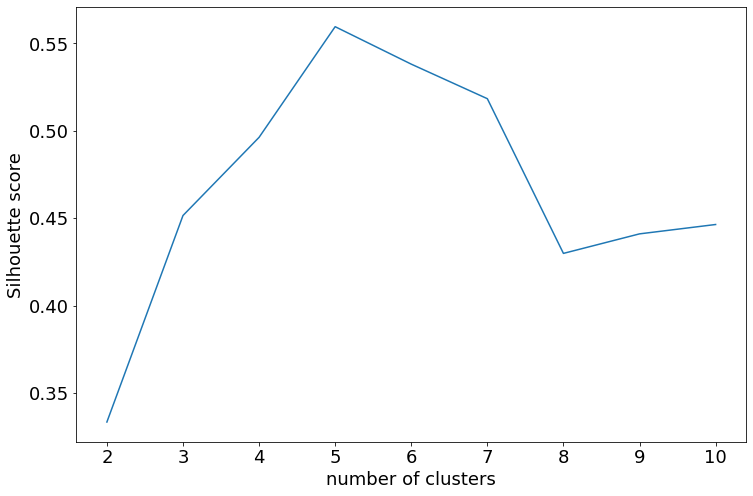

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(2, K+1), store_Silhouette)        
plt.xticks(range(2, K+1), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Silhouette score",fontsize = 18)
plt.xlabel("number of clusters", fontsize = 18)


As we can see, the highest Silhouette score happens at $k = 5$, which will be the optimal number of segments to use. 